# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = '/content/drive/MyDrive/mini-1/2023.02.13_미니프로젝트1차_실습자료/df_seoul_bus_station.csv'
df_seoul_bus_station = pd.read_csv(path, sep=",", encoding = 'UTF-8')

In [9]:
df_seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [11]:
path = '/content/drive/MyDrive/mini-1/2023.02.13_미니프로젝트1차_실습자료/df_seoul_moving.csv'
df_seoul_moving = pd.read_csv(path, sep=",", encoding = 'UTF-8')

In [12]:
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60,21.349599,44.235978
1,11020,9306020,19715322.61,21.012462,44.516072
2,11030,8514380,14707082.87,21.364786,36.903883
3,11040,8887140,17449273.95,21.740324,42.685596
4,11050,8625540,17947278.99,22.474283,46.762548


In [13]:
path = '/content/drive/MyDrive/mini-1/2023.02.13_미니프로젝트1차_실습자료/df_seoul_business.csv'
df_seoul_business = pd.read_csv(path, sep=",", encoding = 'UTF-8', thousands=',')

In [14]:
df_seoul_business.head()

,자치구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
0,종로구,215,1548,618,549,261,948,400,537,110,437
1,중구,230,1588,300,576,339,869,10810,381,57,443
2,용산구,416,857,455,791,366,634,54,487,104,300
3,성동구,1200,956,1072,801,489,547,149,285,258,400
4,광진구,1119,963,968,871,746,590,89,633,413,467


In [15]:
path = '/content/drive/MyDrive/mini-1/2023.02.13_미니프로젝트1차_실습자료/df_seoul_people.csv'
df_seoul_people = pd.read_csv(path, sep=",", encoding = 'UTF-8')

In [16]:
df_seoul_people.head()

,자치구,남자,여자,계
0,합계,4716704,5015913,9732617
1,종로구,74018,79666,153684
2,중구,63869,67581,131450
3,용산구,114571,121947,236518
4,성동구,141662,149947,291609


In [17]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [18]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [19]:
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [20]:
df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [21]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,...,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,계
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,9356120,19385709.60,...,549,261,948,400,537,110,437,74018,79666,153684
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,9306020,19715322.61,...,576,339,869,10810,381,57,443,63869,67581,131450
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,8514380,14707082.87,...,791,366,634,54,487,104,300,114571,121947,236518
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,8887140,17449273.95,...,801,489,547,149,285,258,400,141662,149947,291609
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,8625540,17947278.99,...,871,746,590,89,633,413,467,169525,183585,353110


In [22]:
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,...,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,계
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,9356120,19385709.60,...,549,261,948,400,537,110,437,74018,79666,153684
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,9306020,19715322.61,...,576,339,869,10810,381,57,443,63869,67581,131450
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,8514380,14707082.87,...,791,366,634,54,487,104,300,114571,121947,236518
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,8887140,17449273.95,...,801,489,547,149,285,258,400,141662,149947,291609
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,8625540,17947278.99,...,871,746,590,89,633,413,467,169525,183585,353110
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,8838130,16288077.28,...,842,611,494,211,499,302,442,172318,180274,352592
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,7939300,13907465.59,...,738,790,381,63,535,288,499,193623,199977,393600
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,9072420,18757182.35,...,846,739,457,85,512,464,365,212277,230403,442680
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,7649610,12570412.30,...,589,673,358,40,580,220,362,145934,154890,300824
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,6995880,10821566.75,...,515,600,288,22,258,351,302,154440,163660,318100


In [23]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),...,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,계
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.235541,0.473119,0.533514,...,0.652064,0.668534,0.254269,-0.313424,0.316607,0.571740,0.314030,0.697314,0.675779,0.687074
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.356947,0.355635,0.223747,...,0.423486,0.485323,0.240643,-0.485615,0.366972,0.347181,0.335055,0.550032,0.580536,0.566615
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,0.388332,0.226437,-0.678600,...,0.006077,-0.261457,0.395274,0.276170,0.147328,-0.152747,0.104076,-0.294351,-0.268906,-0.281536
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,0.581339,0.576553,-0.110113,...,0.542368,0.357367,0.488169,-0.151233,0.354584,0.349527,0.388479,0.359532,0.368034,0.364433
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,0.572769,0.558699,-0.097082,...,0.524065,0.367160,0.457139,-0.165922,0.364663,0.328345,0.373733,0.384499,0.390470,0.388119
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,0.140483,0.067920,-0.382202,...,0.025778,-0.252539,0.167839,0.078903,0.068706,-0.258910,-0.101126,-0.255715,-0.282278,-0.269854
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,0.148381,0.062384,-0.356171,...,0.020158,-0.211110,0.131875,0.038822,0.101567,-0.271561,-0.103504,-0.192074,-0.221558,-0.207643
총 이동 시간,0.235541,0.356947,0.388332,0.581339,0.572769,0.140483,0.148381,1.000000,0.923298,-0.141914,...,0.722944,0.380986,0.836271,0.126450,0.444979,0.419533,0.756714,0.350985,0.393565,0.373570
총 이동 인구,0.473119,0.355635,0.226437,0.576553,0.558699,0.067920,0.062384,0.923298,1.000000,0.095727,...,0.888214,0.594490,0.854651,0.029200,0.446980,0.653779,0.818619,0.509632,0.544162,0.528251
평균 이동 시간(분),0.533514,0.223747,-0.678600,-0.110113,-0.097082,-0.382202,-0.356171,-0.141914,0.095727,1.000000,...,0.320276,0.625962,-0.165649,-0.314802,0.093804,0.381773,0.169795,0.644669,0.631852,0.638885


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (인당 최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 정류장 수와 승차 총 승객수

    H0 : 정류장 수와 승차 총 승객수는 연관이 없다

    
    H1 : 정류장 수와 승차 총 승객수는 연관이 있다

* 가설 2 노선 수와 총 이동시간

    H0 : 노선 수와 총 이동시간은 연관이 없다

    
    H1 : 노선 수와 총 이동시간은 연관이 있다


* 가설 3 정류장 수와 이동인구(합)

* 가설 4 노선 수와 평균 이동 시간

* 가설 5 노선 수와 커피전문점 이용자수

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [25]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [26]:
import scipy.stats as spst

result = spst.pearsonr(df['총 이동 인구'],df['승차총승객수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

# 강한 양의 상관관계 
# 귀무가설 기각 
# 정류장수와 승차 총승객수는 상관관계가 있다

상관계수 : 0.5765529811137535, p-value : 0.002554753067686571


상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음

- 음수 똑같음 




p-value 기준을 0.05로 가져갔죠 5% (1%, 0.1%)



p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)



- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 하는데 p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함



In [27]:
spst.pearsonr(df['노선수'],df['총 이동 시간'])
# p-value가 0.05보다 크다 == 귀무가설을 기각하지 못한다 == 대립가설이 틀렸다

PearsonRResult(statistic=0.3883324879805674, pvalue=0.055070919400459266)

In [28]:
df['비율1'] = df['정류장수'] / df['승차총승객수'] * 10000
df.sort_values(by=['비율1']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,...,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,계,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,9306020,19715322.61,...,339,869,10810,381,57,443,63869,67581,131450,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,8838130,16288077.28,...,611,494,211,499,302,442,172318,180274,352592,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,8772170,18725641.04,...,895,581,31,658,354,422,250450,249886,500336,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,11437560,44684651.43,...,1241,1624,384,713,1426,827,257096,280242,537338,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,9356120,19385709.60,...,261,948,400,537,110,437,74018,79666,153684,0.638150


## 4.관계 정리

### 1) 강한 관계의 변수

정류장 - 승차 총 승객수

### 2) 중간 관계의 변수

노선수 - 커피전문점.1(종사자수)

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

강남구 - 중구 - 동대문구 - 관악구에 필요합니다

In [29]:
# 자치구 별 버스 이용객수 총 합(승차총승객수)
df_jm2 = df.groupby(["자치구"], as_index=False)['승차총승객수'].sum()
df_jm2

,자치구,승차총승객수
0,강남구,8030483
1,강동구,2890053
2,강북구,4825181
3,강서구,4681083
4,관악구,7655819
5,광진구,2749448
6,구로구,4942197
7,금천구,3776658
8,노원구,4353295
9,도봉구,3304305


In [30]:
print()
print(spst.pearsonr(df['정류장수'],df['택시운송업'])) # 1


PearsonRResult(statistic=0.25481757842232977, pvalue=0.2189681588726554)


In [31]:
# 상관관계 분석
# 등록 업종 수에 따른 버스이용승객수
print(spst.pearsonr(df['노선수'],df['승차총승객수']))
print()
print(spst.pearsonr(df['노선수'],df['하차총승객수']))
print()
print(spst.pearsonr(df['노선수'],df['승차평균승객수']))
print()
print(spst.pearsonr(df['노선수'],df['하차평균승객수']))
print()
print(spst.pearsonr(df['노선수'],df['총 이동 시간']))
print()
print(spst.pearsonr(df['노선수'],df['총 이동 인구']))
print()
print(spst.pearsonr(df['노선수'],df['평균 이동 시간(분)']))
print()
print(spst.pearsonr(df['노선수'],df['이동인구(합)']))

PearsonRResult(statistic=0.6654877832095702, pvalue=0.00028308622857719856)

PearsonRResult(statistic=0.6526422720355218, pvalue=0.00040610118937178363)

PearsonRResult(statistic=0.49354079092741227, pvalue=0.012170019218131677)

PearsonRResult(statistic=0.47044012541493446, pvalue=0.017632441540646512)

PearsonRResult(statistic=0.3883324879805674, pvalue=0.055070919400459266)

PearsonRResult(statistic=0.2264373721579081, pvalue=0.27640170657157326)

PearsonRResult(statistic=-0.6786000547455108, pvalue=0.00019237294667152335)

PearsonRResult(statistic=-0.003649199044495871, pvalue=0.9861878215000316)


p-value 0.05보다 작으면 유의미
강한 : 0.5 < 𝑟 ≤ 1
중간 : 0.2 < 𝑟 ≤ 0.5
약한 : 0.1 < 𝑟 ≤ 0.2
(거의)없음 : 𝑟 ≤ 0.1



승차 하차 승차평균 하차평균 승객수와는 강한 상관관계가 있고 p-value가 0.05보다 작아 유의미하다는것을 알 수 있다.

In [32]:
print()
print(spst.pearsonr(df['노선수'],df['택시운송업'])) # 1
print()
print(spst.pearsonr(df['노선수'],df['한식 일반 음식점업'])) # 3
print()
print(spst.pearsonr(df['노선수'],df['용달 화물자동차 운송업'])) # 2
print()
print(spst.pearsonr(df['노선수'],df['부동산 중개 및 대리업']))
print()
print(spst.pearsonr(df['노선수'],df['두발미용업']))
print()
print(spst.pearsonr(df['노선수'],df['커피전문점']))
print()
print(spst.pearsonr(df['노선수'],df['남녀용 겉옷 및 셔츠 도매업']))
print()
print(spst.pearsonr(df['노선수'],df['기타주점업']))
print()
print(spst.pearsonr(df['노선수'],df['일반 교과 학원']))
print()
print(spst.pearsonr(df['노선수'],df['한식 육류요리 전문점']))


PearsonRResult(statistic=-0.601440072069635, pvalue=0.001472088462531435)

PearsonRResult(statistic=0.4047476348335748, pvalue=0.04475499749536911)

PearsonRResult(statistic=-0.576135888689241, pvalue=0.0025775192579727143)

PearsonRResult(statistic=0.006076562081000464, pvalue=0.9770021791700589)

PearsonRResult(statistic=-0.2614574192775836, pvalue=0.20678415682998108)

PearsonRResult(statistic=0.3952739247006174, pvalue=0.0505040593417431)

PearsonRResult(statistic=0.27617030247252855, pvalue=0.18144473120880025)

PearsonRResult(statistic=0.14732845674186879, pvalue=0.4821937415104073)

PearsonRResult(statistic=-0.15274719935722708, pvalue=0.4660445765894801)

PearsonRResult(statistic=0.10407600592387924, pvalue=0.6205389749949366)


In [33]:
print()
print(spst.pearsonr(df['노선수'],df['택시운송업'])) # 1
print()
print(spst.pearsonr(df['노선수'],df['한식 일반 음식점업'])) # 3
print()
print(spst.pearsonr(df['노선수'],df['용달 화물자동차 운송업'])) # 2


PearsonRResult(statistic=-0.601440072069635, pvalue=0.001472088462531435)

PearsonRResult(statistic=0.4047476348335748, pvalue=0.04475499749536911)

PearsonRResult(statistic=-0.576135888689241, pvalue=0.0025775192579727143)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

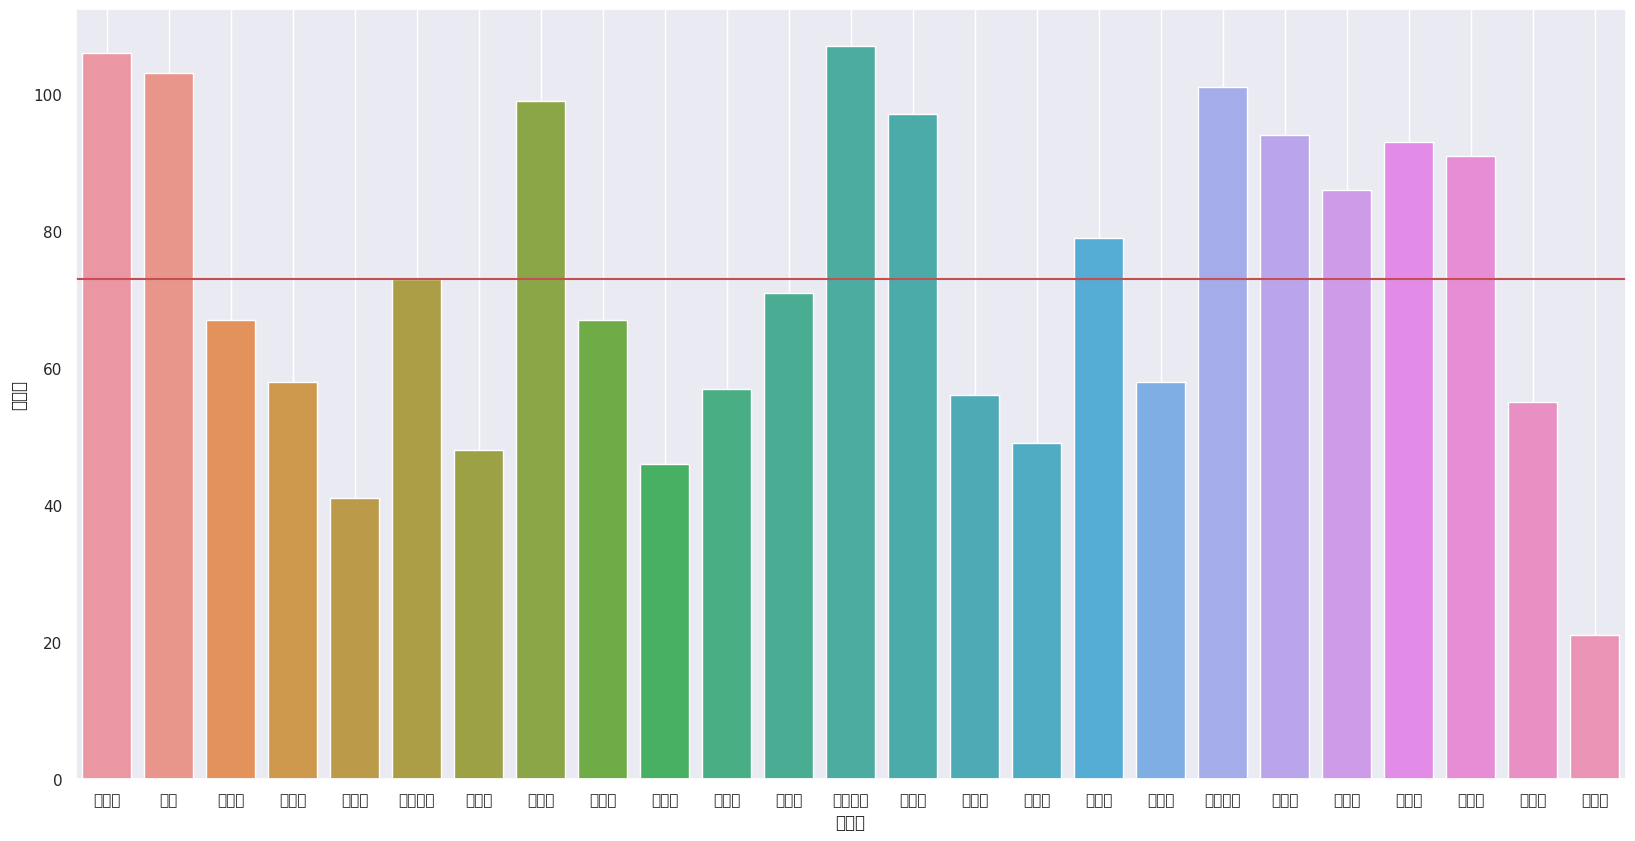

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x="자치구", y="노선수", data=df)
plt.axhline(df['노선수'].mean(), color = 'r')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

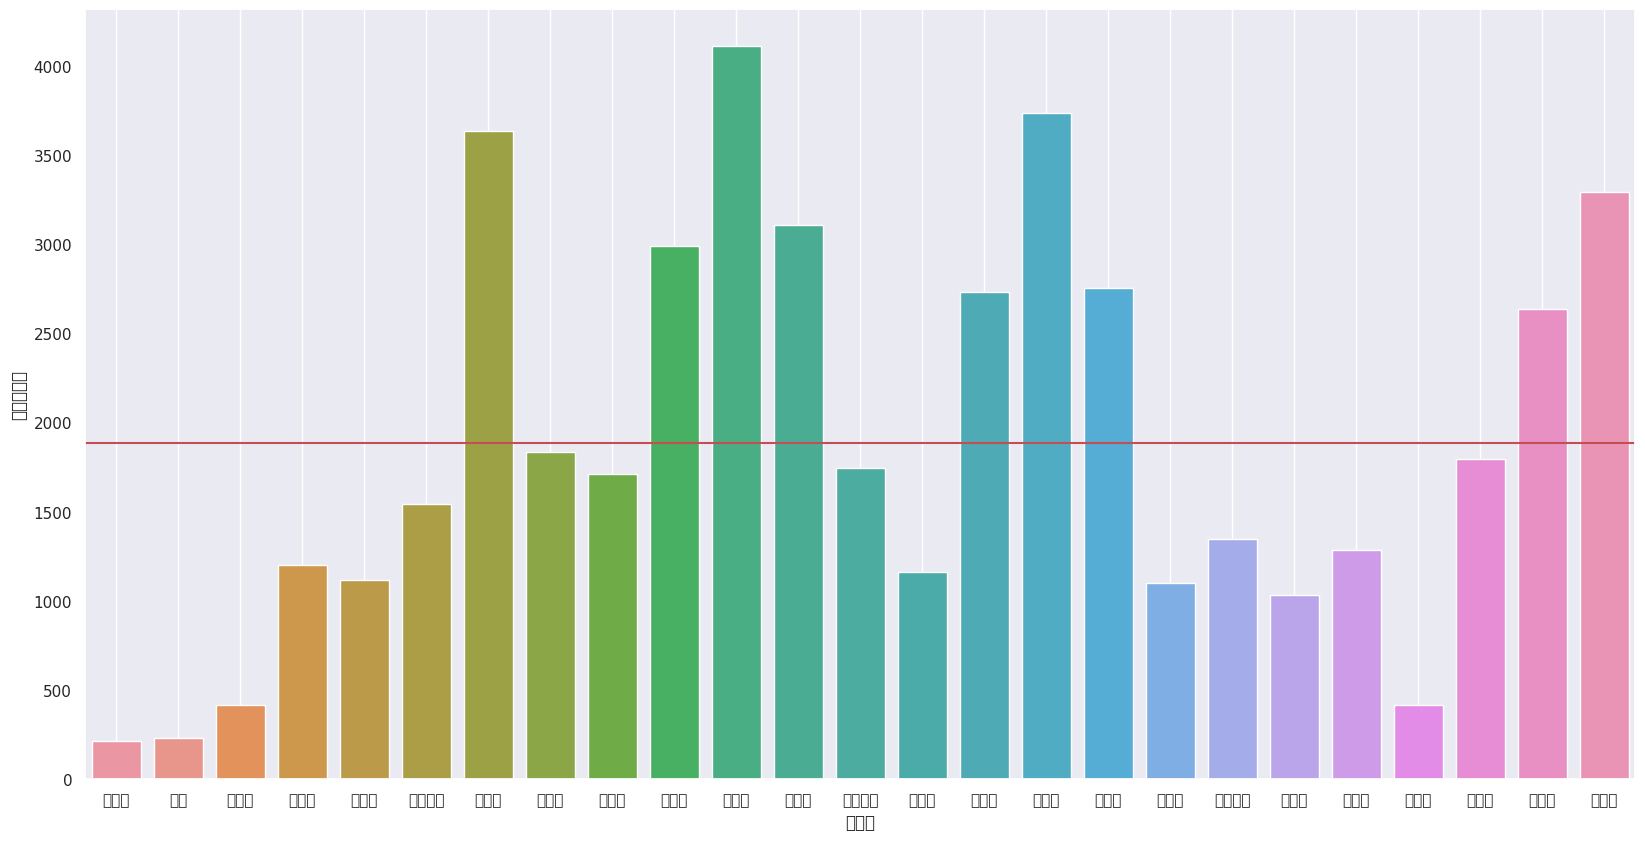

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x="자치구", y="택시운송업", data=df)
plt.axhline(df['택시운송업'].mean(), color = 'r')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

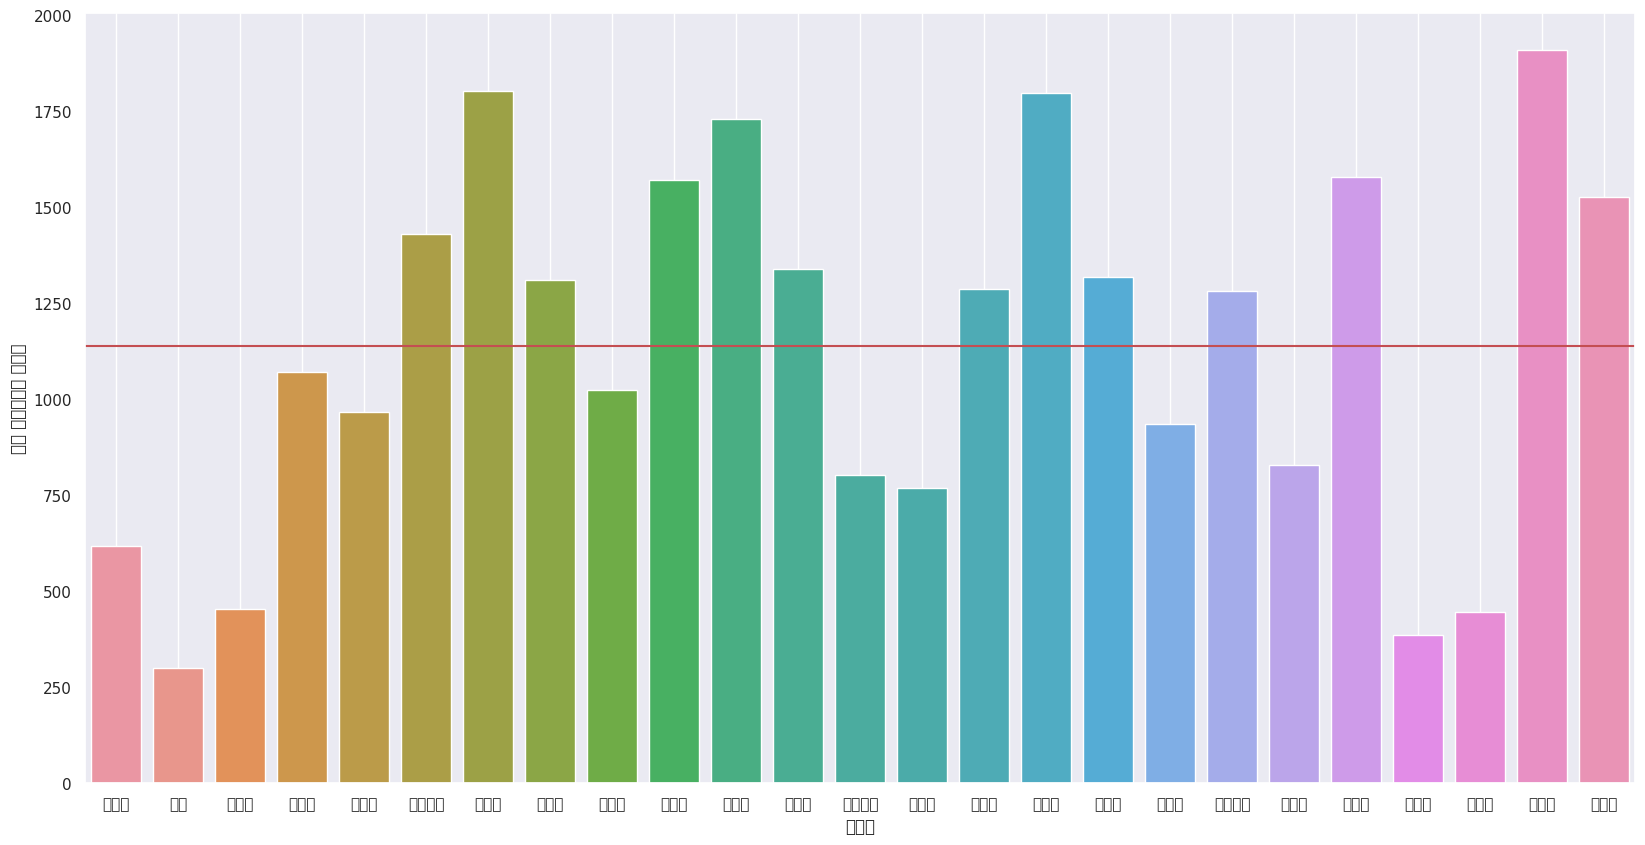

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x="자치구", y="용달 화물자동차 운송업", data=df)
plt.axhline(df['용달 화물자동차 운송업'].mean(), color = 'r')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

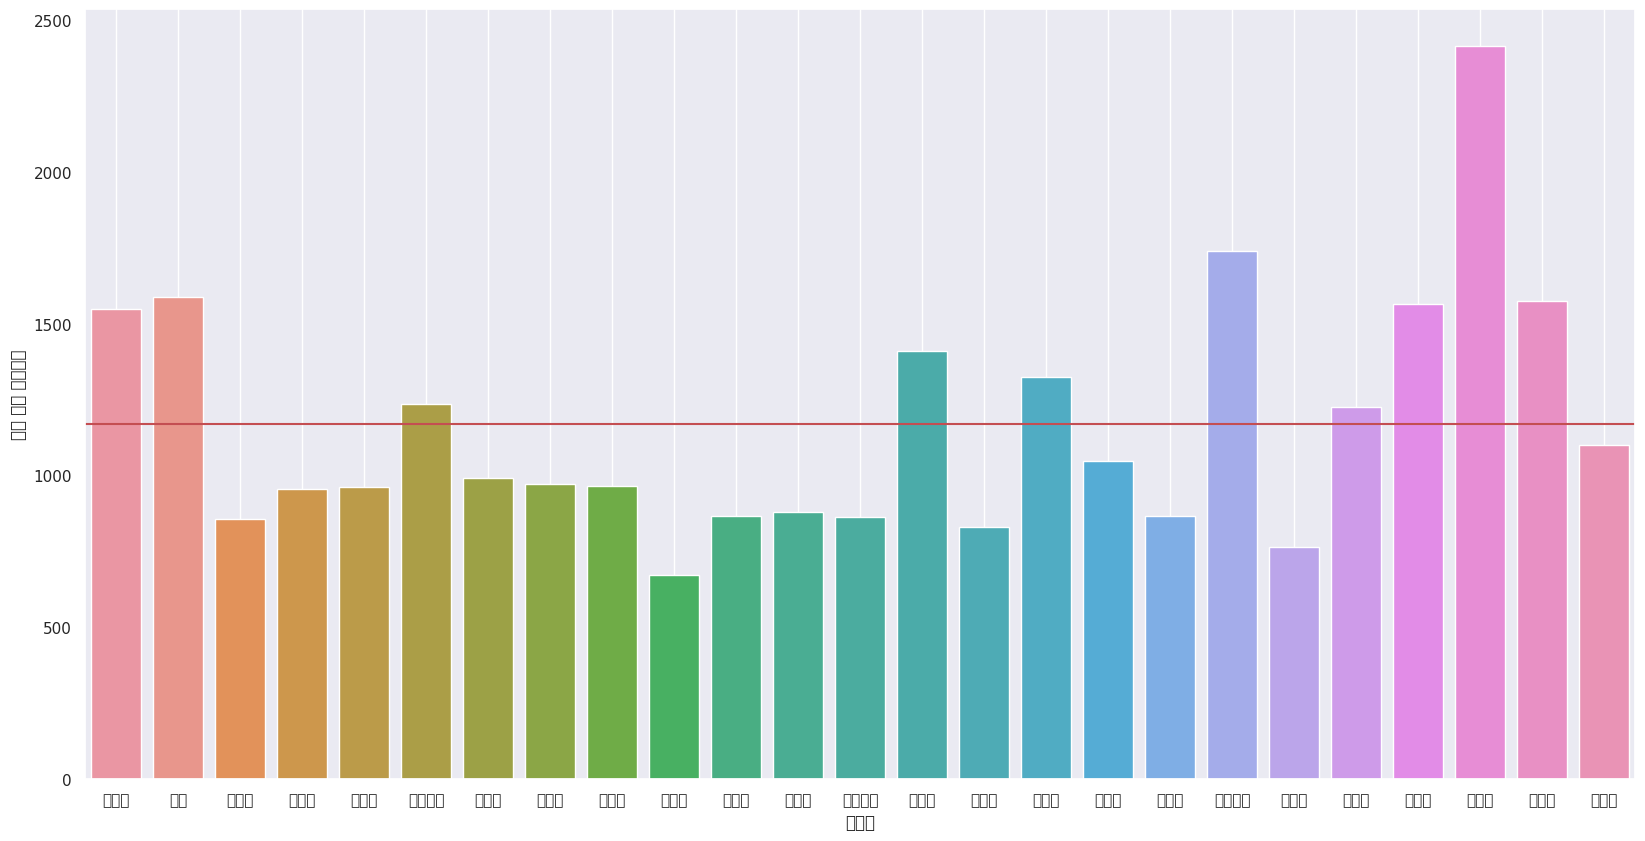

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x="자치구", y="한식 일반 음식점업", data=df)
plt.axhline(df['한식 일반 음식점업'].mean(), color = 'r')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

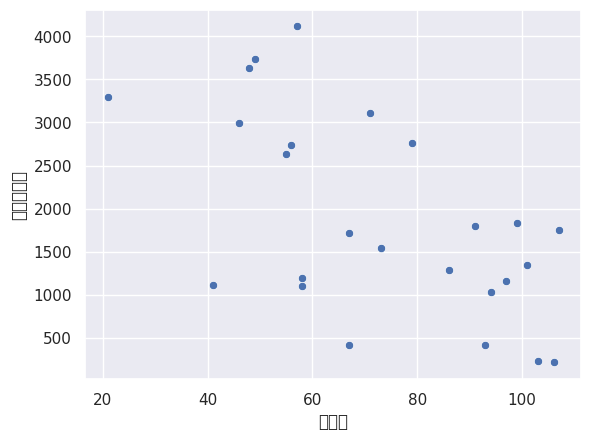

In [38]:
sns.scatterplot(x='노선수', y='택시운송업', data = df)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

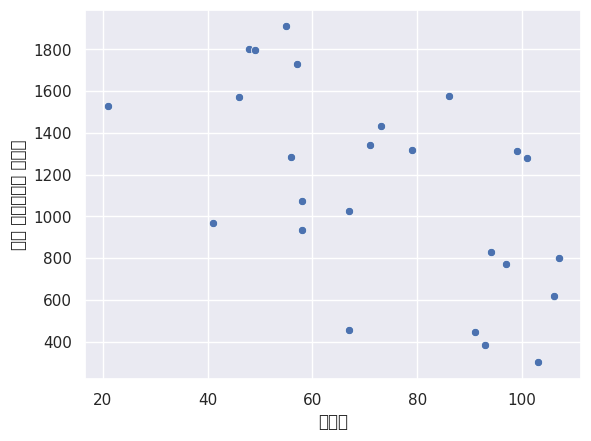

In [39]:
sns.scatterplot(x='노선수', y='용달 화물자동차 운송업', data = df)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

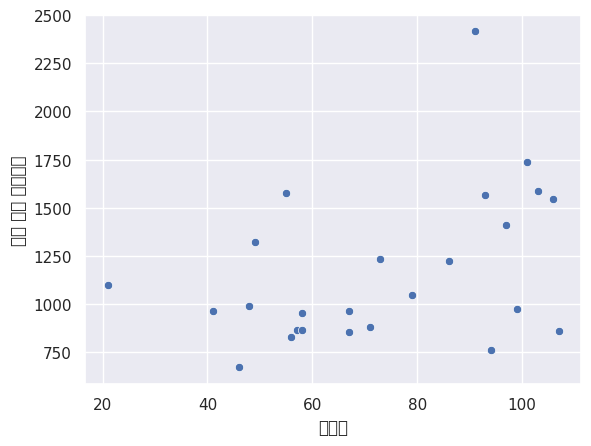

In [40]:
sns.scatterplot(x='노선수', y='한식 일반 음식점업', data = df)
plt.show()

In [41]:
def anl_n(data, var):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.scatterplot(x=var, y=target, data=data)
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,2)
    sns.regplot(x=var, y = target, data = data)
    plt.show()
    
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

In [42]:
print()
print(spst.pearsonr(df['노선수'],df['택시운송업'])) # 1
print()
print(spst.pearsonr(df['노선수'],df['한식 일반 음식점업'])) # 3
print()
print(spst.pearsonr(df['노선수'],df['용달 화물자동차 운송업'])) # 2


PearsonRResult(statistic=-0.601440072069635, pvalue=0.001472088462531435)

PearsonRResult(statistic=0.4047476348335748, pvalue=0.04475499749536911)

PearsonRResult(statistic=-0.576135888689241, pvalue=0.0025775192579727143)


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  func(*a

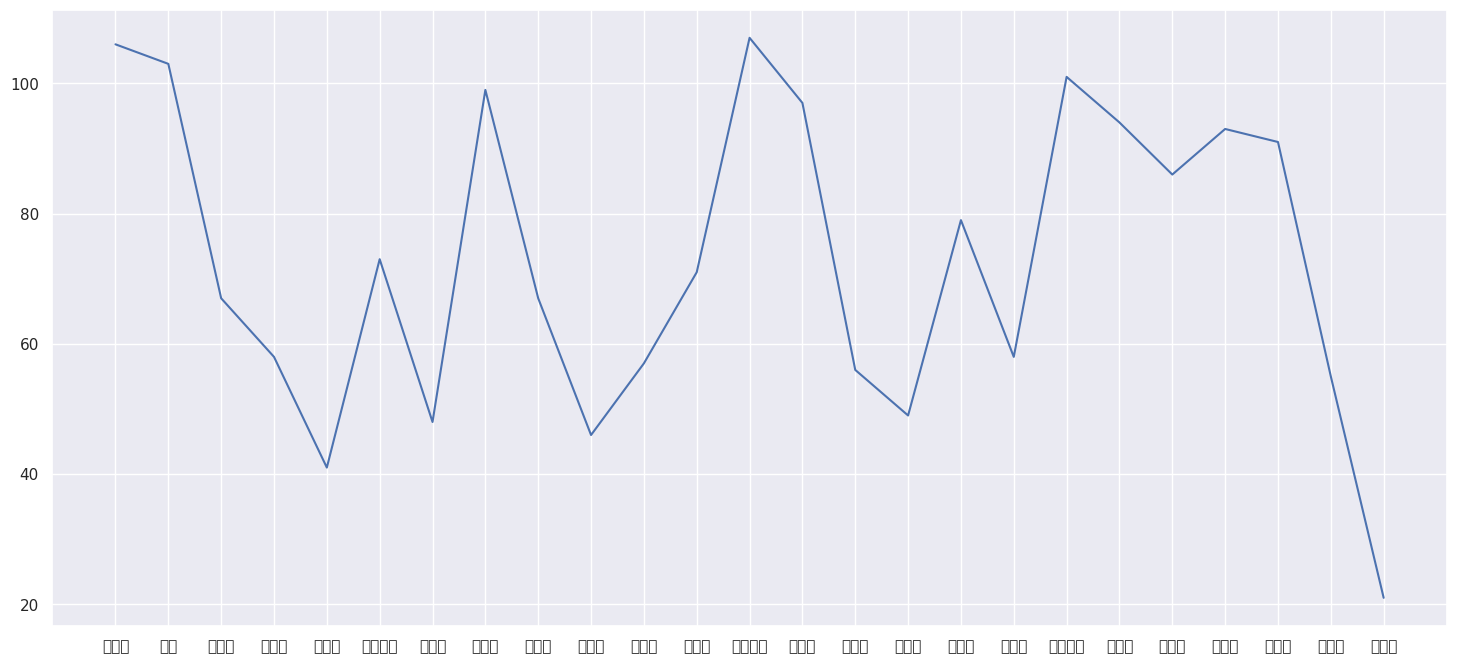

In [43]:
plt.figure(figsize=(18, 8))
plt.plot(df['자치구'], df['노선수'])

In [44]:
def graph(var, target, df):
    plt.figure(figsize=(20,10))
    plt.subplot(4,1,j)
    sns.barplot(x=var, y=target, data=df)
    plt.axhline(df[target].mean(), color = 'r')
    plt.grid()
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

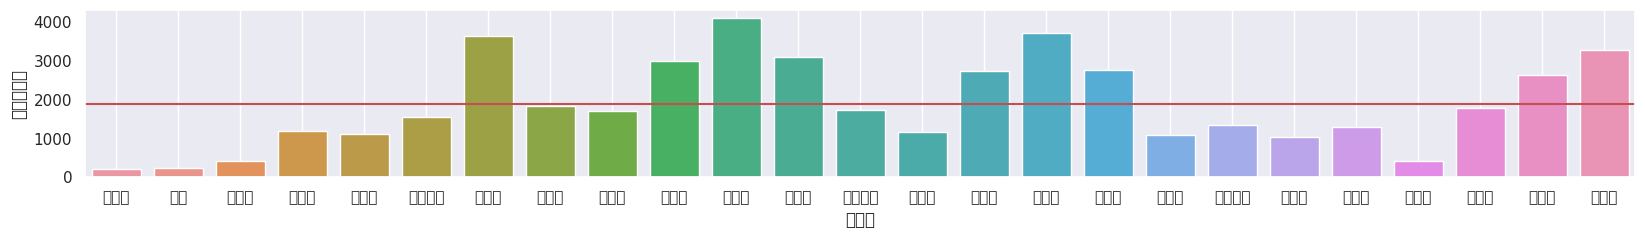

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

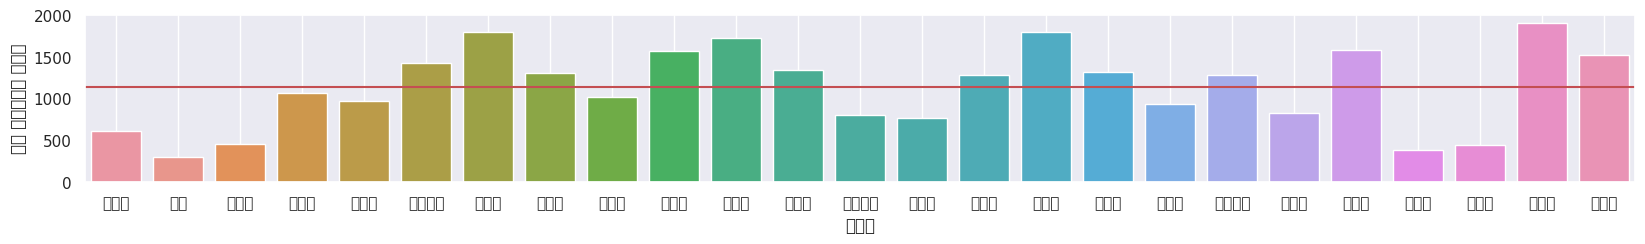

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

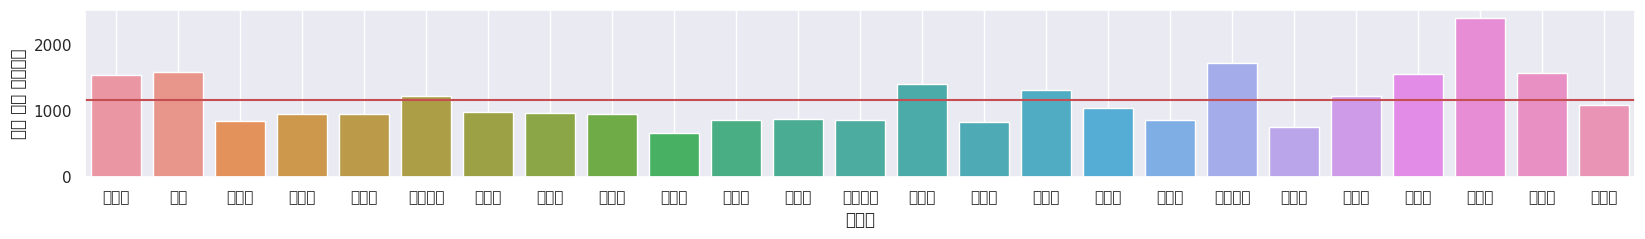

In [45]:
j = 1
for i in ['택시운송업', '용달 화물자동차 운송업', '한식 일반 음식점업']:
    graph('자치구', i, df)
    j += j

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

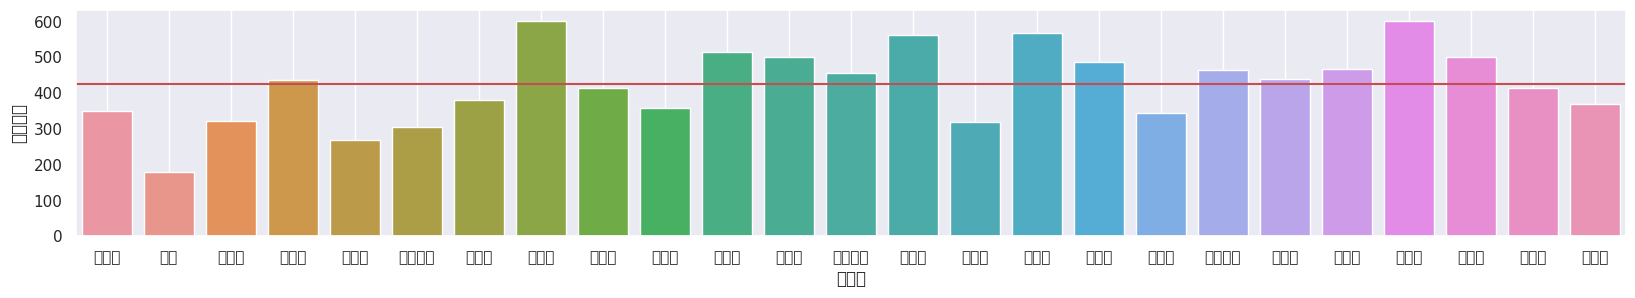

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

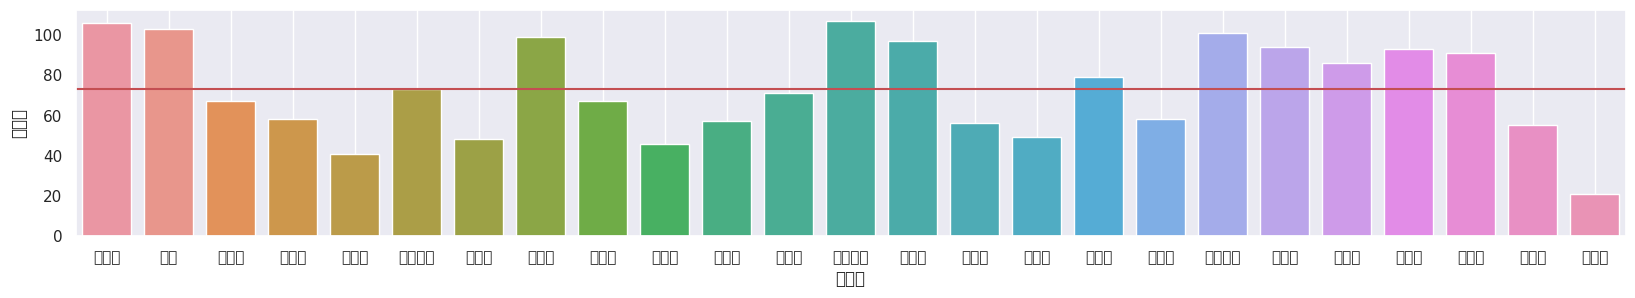

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

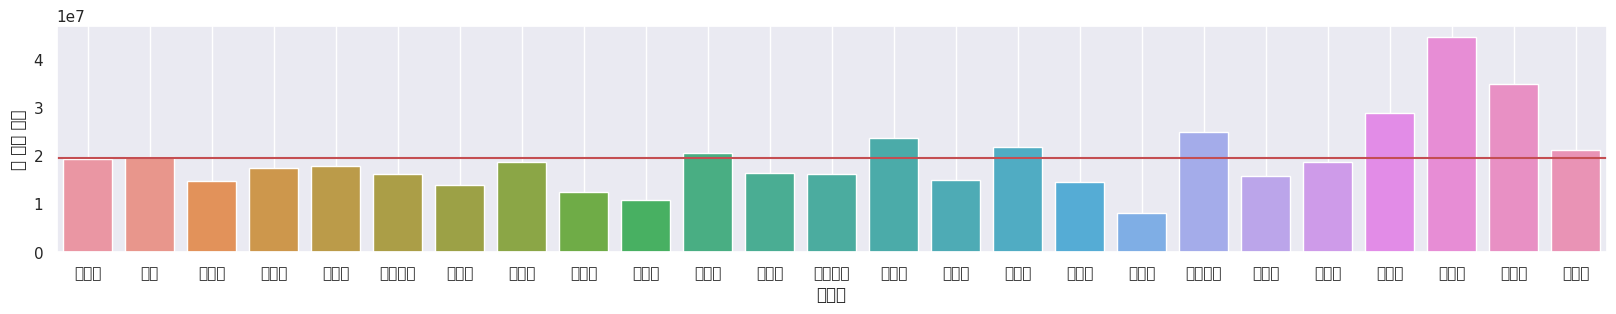

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
sns.barplot(x="자치구", y="정류장수", data=df)
plt.axhline(df['정류장수'].mean(), color = 'r')
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(3,1,2)
sns.barplot(x="자치구", y="노선수", data=df)
plt.axhline(df['노선수'].mean(), color = 'r')
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(3,1,3)
sns.barplot(x="자치구", y="총 이동 인구", data=df)
plt.axhline(df['총 이동 인구'].mean(), color = 'r')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

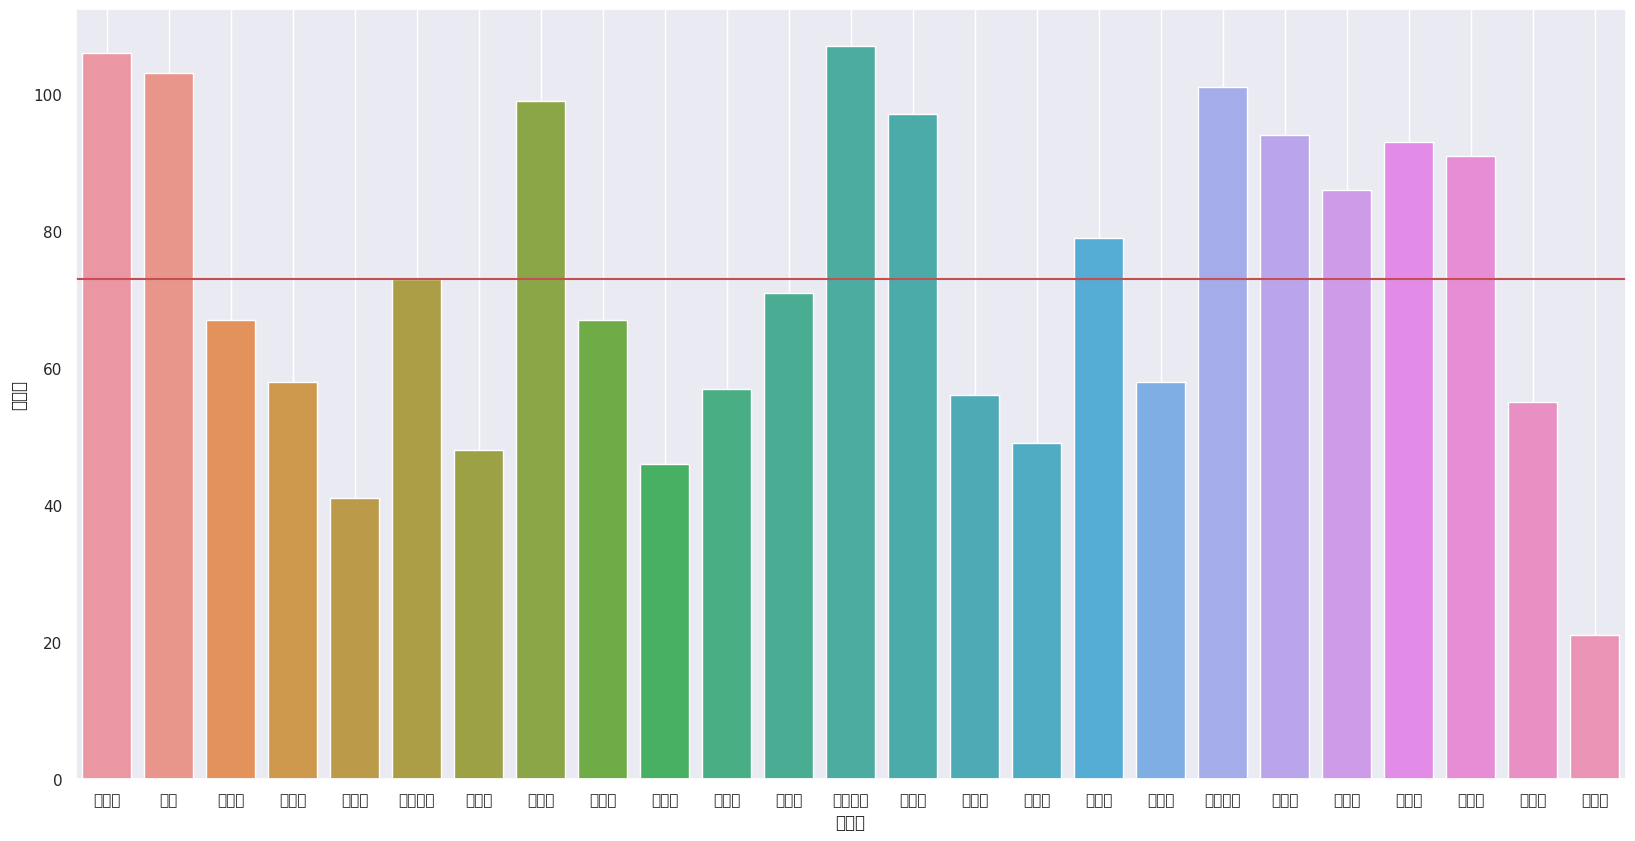

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x="자치구", y="노선수", data=df)
plt.axhline(df['노선수'].mean(), color = 'r')
plt.grid()
plt.show()